In [ ]:
import numpy as np

def invariant_pram(TX, theta):
    """
    Calculate the transition probability matrix P in invariant PRAM.

    Parameters:
    TX (numpy.array): Vector of frequencies of categories in original file X.
    theta (float): Parameter controlling the perturbation level. Should be between 0 and 1.

    Returns:
    numpy.array: Transition probability matrix P.
    """
    num_categories = len(TX)
    smallest_freq_index = np.argmin(TX)
    P = np.zeros((num_categories, num_categories))

    for i in range(num_categories):
        for j in range(num_categories):
            if i == j:
                P[i, j] = 1 - theta * TX[smallest_freq_index] / TX[i] if TX[i] > 0 else 0
            else:
                P[i, j] = theta * TX[smallest_freq_index] / ((num_categories - 1) * TX[i]) if TX[i] > 0 else 0

    return P

def calculate_epsilon(P):
    """
    Calculate epsilon value for each category based on the transition probability matrix P.

    Parameters:
    P (numpy.array): Transition probability matrix.

    Returns:
    numpy.array: List of epsilon values for each category.
    """
    num_categories = P.shape[0]
    epsilon_values = np.zeros(num_categories)

    for k in range(num_categories):
        max_epsilon = -np.inf
        for i in range(num_categories):
            for j in range(num_categories):
                if i != j and P[k, i] > 0 and P[k,j] >0:
                    epsilon = np.log(P[k, i] / P[k, j])
                    if epsilon > max_epsilon:
                        max_epsilon = epsilon
    return max_epsilon

# Example usage:
TX = np.array([100, 50, 30])  # Frequencies of categories in original file X
theta = 0.2  # Parameter controlling the perturbation level

# Calculate transition probability matrix P
P = invariant_pram(TX, theta)

print(P)
# Calculate epsilon value for each category
epsilon_value = calculate_epsilon(P)
print("Epsilon value for the matrix", epsilon_value)

[[0.94 0.03 0.03]
 [0.06 0.88 0.06]
 [0.1  0.1  0.8 ]]
Epsilon value for the matrix 2.0794415416798357


In [ ]:
TX = np.array([1,1000,100])  # Frequencies of categories in original file X
theta = 0.2  # Parameter controlling the perturbation level

# Calculate transition probability matrix P
P = invariant_pram(TX, theta)

print(P)
# Calculate epsilon value for each category
epsilon_value = calculate_epsilon(P)
print("Epsilon value for the matrix", epsilon_value)

[[8.000e-01 1.000e-01 1.000e-01]
 [1.000e-04 9.998e-01 1.000e-04]
 [1.000e-03 1.000e-03 9.980e-01]]
Epsilon value for the matrix 6.905753276311464


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
import statistics
import itertools
import random
import math
import time

# Read data from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "work_class", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]
adult = pd.read_csv(url, names=column_names, na_values=' ?')

# Display the first few rows of the DataFrame
print("Shape of the DataFrame:", adult.shape)
adult.head()

Shape of the DataFrame: (32561, 15)


,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
categorical_columns = [col for col in adult.columns if adult[col].nunique() < 20]  # Adjust the threshold as needed

# Extract only the columns identified as categorical variables
adult = adult[categorical_columns]

# Display the first few rows of the extracted categorical data
print("Shape of the categorical data:", adult.shape)
adult

Shape of the categorical data: (32561, 9)


,work_class,education,education_num,marital_status,occupation,relationship,race,sex,income
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K
4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K
32557,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K
32558,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,<=50K
32559,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,<=50K


In [ ]:
adult = adult.drop('income', axis=1)

In [ ]:
adult = adult.drop('education', axis=1)

In [ ]:
# Convert income attribute to binary (0 and 1)
#adult['income'] = adult['income'].map({' <=50K': 0, ' >50K': 1})

# Convert categorical variables into numerical values using one-hot encoding
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()           #label encoder variable for 'work_class'
adult.work_class = le1.fit_transform(adult.work_class)

#le2 = preprocessing.LabelEncoder()           #label encoder variable for 'education'
#adult.education = le2.fit_transform(adult.education)

le3 = preprocessing.LabelEncoder()           #label encoder variable for 'maritial_status'
adult.marital_status = le3.fit_transform(adult.marital_status)

le4 = preprocessing.LabelEncoder()           #label encoder variable for 'occupation'
adult.occupation = le4.fit_transform(adult.occupation)

le5 = preprocessing.LabelEncoder()           #label encoder variable for 'relationship'
adult.relationship = le5.fit_transform(adult.relationship)

le6 = preprocessing.LabelEncoder()           #label encoder variable for 'race'
adult.race = le6.fit_transform(adult.race)

le7 = preprocessing.LabelEncoder()           #label encoder variable for 'sex'
adult.sex = le7.fit_transform(adult.sex)


In [ ]:
adult

,work_class,education_num,marital_status,occupation,relationship,race,sex
0,6,13,4,0,1,4,1
1,5,13,2,3,0,4,1
2,3,9,0,5,1,4,1
3,3,7,2,5,0,2,1
4,3,13,2,9,5,2,0
...,...,...,...,...,...,...,...
32556,3,12,2,12,5,4,0
32557,3,9,2,6,0,4,1
32558,3,9,6,0,4,4,0
32559,3,9,4,0,3,4,1


In [ ]:
column_frequencies = {}

# Iterate over each column in the DataFrame
for column in adult.columns:
    # Calculate the frequency counts for the current column
    frequency_counts = adult[column].value_counts()

    # Store the frequency counts in the dictionary
    column_frequencies[column] = frequency_counts

# Display the frequency counts for each column
for column, frequency_counts in column_frequencies.items():
    print("Frequency counts for column '{}':\n{}".format(column, frequency_counts))

Frequency counts for column 'work_class':
work_class
3    22696
5     2541
1     2093
8     1836
6     1298
4     1116
0      960
7       14
2        7
Name: count, dtype: int64
Frequency counts for column 'education_num':
education_num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64
Frequency counts for column 'marital_status':
marital_status
2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: count, dtype: int64
Frequency counts for column 'occupation':
occupation
9     4140
2     4099
3     4066
0     3770
11    3650
7     3295
6     2002
14    1843
13    1597
5     1370
4      994
12     928
10     649
8      149
1        9
Name: count, dtype: int64
Frequency counts for column 'relationship':
relationship
0    13193
1     8305
3     5068
4     3446
5     1568
2      981
Name: count, d

In [ ]:
frequencies = []

for i in adult.columns:
    frequencies.append(list(column_frequencies[i]))

In [ ]:
frequencies

[[22696, 2541, 2093, 1836, 1298, 1116, 960, 14, 7],
 [10501,
  7291,
  5355,
  1723,
  1382,
  1175,
  1067,
  933,
  646,
  576,
  514,
  433,
  413,
  333,
  168,
  51],
 [14976, 10683, 4443, 1025, 993, 418, 23],
 [4140,
  4099,
  4066,
  3770,
  3650,
  3295,
  2002,
  1843,
  1597,
  1370,
  994,
  928,
  649,
  149,
  9],
 [13193, 8305, 5068, 3446, 1568, 981],
 [27816, 3124, 1039, 311, 271],
 [21790, 10771]]

In [ ]:
TX = []
epsilon_values = []
for i in range(len(frequencies)):

  TX.append(np.array(frequencies[i])) # Frequencies of categories in original file X
  theta = 0.1  # Parameter controlling the perturbation level

  # Calculate transition probability matrix P
  P = invariant_pram(TX[i], theta)

  #print(P)
  # Calculate epsilon value for each category
  epsilon_values.append(calculate_epsilon(P))
  print("Epsilon value for each matrix coresponding to each variable", epsilon_values[i])

Epsilon value for each matrix coresponding to each variable 4.276666119016055
Epsilon value for each matrix coresponding to each variable 4.90527477843843
Epsilon value for each matrix coresponding to each variable 3.988984046564274
Epsilon value for each matrix coresponding to each variable 4.836281906951478
Epsilon value for each matrix coresponding to each variable 3.8066624897703196
Epsilon value for each matrix coresponding to each variable 3.58351893845611
Epsilon value for each matrix coresponding to each variable 2.197224577336219


In [ ]:
epsilon_values

[4.276666119016055,
 4.90527477843843,
 3.988984046564274,
 4.836281906951478,
 3.8066624897703196,
 3.58351893845611,
 2.197224577336219]

In [ ]:
num_of_categories = []

for i in range(len(TX)):
  num_of_categories.append(len(TX[i]))

In [ ]:
num_of_categories

[9, 16, 7, 15, 6, 5, 2]

In [ ]:
len(frequencies)

7

In [ ]:
TX = []
epsilon_values1 = []
for i in range(len(frequencies)):

  TX.append(np.array(frequencies[i])) # Frequencies of categories in original file X
  theta = 0.3  # Parameter controlling the perturbation level

  # Calculate transition probability matrix P
  P = invariant_pram(TX[i], theta)

  #print(P)
  # Calculate epsilon value for each category
  epsilon_values1.append(calculate_epsilon(P))
  print("Epsilon value for each matrix coresponding to each variable", epsilon_values[i])

Epsilon value for each matrix coresponding to each variable 4.276666119016055
Epsilon value for each matrix coresponding to each variable 4.90527477843843
Epsilon value for each matrix coresponding to each variable 3.988984046564274
Epsilon value for each matrix coresponding to each variable 4.836281906951478
Epsilon value for each matrix coresponding to each variable 3.8066624897703196
Epsilon value for each matrix coresponding to each variable 3.58351893845611
Epsilon value for each matrix coresponding to each variable 2.197224577336219


In [ ]:
  epsilon_values

[4.276666119016055,
 4.90527477843843,
 3.988984046564274,
 4.836281906951478,
 3.8066624897703196,
 3.58351893845611,
 2.197224577336219]

In [ ]:
TX = []
epsilon_values2 = []
for i in range(len(frequencies)):

  TX.append(np.array(frequencies[i])) # Frequencies of categories in original file X
  theta = 0.5  # Parameter controlling the perturbation level

  # Calculate transition probability matrix P
  P = invariant_pram(TX[i], theta)

  #print(P)
  # Calculate epsilon value for each category
  epsilon_values2.append(calculate_epsilon(P))
  print("Epsilon value for each matrix coresponding to each variable", epsilon_values[i])

Epsilon value for each matrix coresponding to each variable 4.276666119016055
Epsilon value for each matrix coresponding to each variable 4.90527477843843
Epsilon value for each matrix coresponding to each variable 3.988984046564274
Epsilon value for each matrix coresponding to each variable 4.836281906951478
Epsilon value for each matrix coresponding to each variable 3.8066624897703196
Epsilon value for each matrix coresponding to each variable 3.58351893845611
Epsilon value for each matrix coresponding to each variable 2.197224577336219


In [ ]:
epsilon_values2

[2.0794415416798357,
 2.70805020110221,
 1.791759469228055,
 2.6390573296152584,
 1.6094379124341003,
 1.3862943611198906,
 0.0]

In [ ]:
TX = []
epsilon_values3 = []
for i in range(len(frequencies)):

  TX.append(np.array(frequencies[i])) # Frequencies of categories in original file X
  theta = 0.6  # Parameter controlling the perturbation level

  # Calculate transition probability matrix P
  P = invariant_pram(TX[i], theta)

  #print(P)
  # Calculate epsilon value for each category
  epsilon_values3.append(calculate_epsilon(P))
  print("Epsilon value for each matrix coresponding to each variable", epsilon_values3[i])

Epsilon value for each matrix coresponding to each variable 1.6739764335716716
Epsilon value for each matrix coresponding to each variable 2.302585092994046
Epsilon value for each matrix coresponding to each variable 1.3862943611198908
Epsilon value for each matrix coresponding to each variable 2.2335922215070947
Epsilon value for each matrix coresponding to each variable 1.203972804325936
Epsilon value for each matrix coresponding to each variable 0.9808292530117263
Epsilon value for each matrix coresponding to each variable 0.4054651081081642


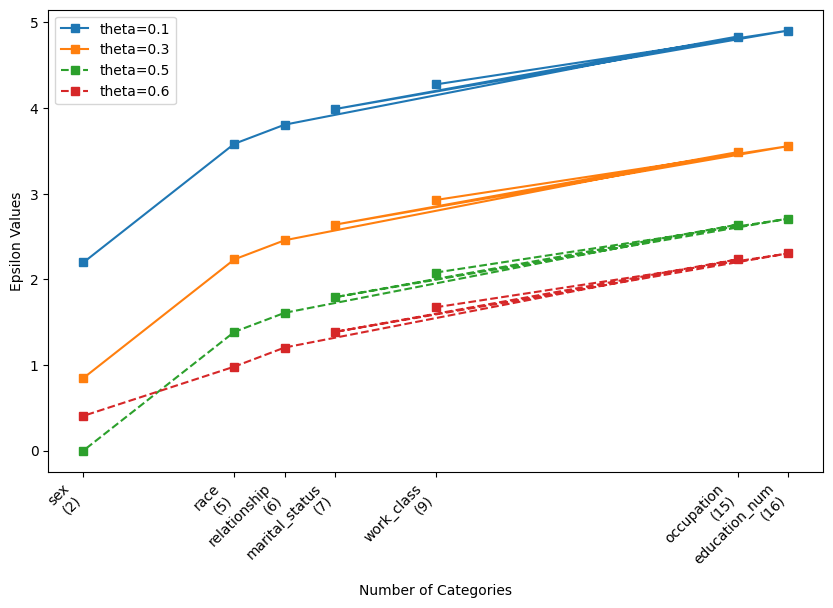

In [ ]:
import matplotlib.pyplot as plt

category_names = adult.columns
# Number of categories for the adult dataset
num_categories = [9, 16, 7, 15, 6, 5, 2]

labels = [f'{name}\n({num})' for name, num in zip(category_names, num_categories)]


# Plot the line plots for both epsilon values
plt.figure(figsize=(10, 6))

plt.plot(num_categories, epsilon_values, marker='s', linestyle='-', label='theta=0.1')
plt.plot(num_categories, epsilon_values1, marker='s', linestyle='-', label='theta=0.3')
plt.plot(num_categories, epsilon_values2, marker='s', linestyle='--', label='theta=0.5')  # Example additional line
plt.plot(num_categories, epsilon_values3, marker='s', linestyle='--', label='theta=0.6')

# Add labels and title
#plt.title('Epsilon Values Vs. Number of Categories for Adult dataset')
plt.xlabel('Number of Categories')
plt.ylabel('Epsilon Values')

plt.xticks(num_categories, labels, rotation=45, ha='right')

# Add legend
plt.legend()

# Show grid
#plt.grid(True)
plt.savefig('EpsilonVsCategoriesAdult.pdf')
# Show the plot
plt.show()
